In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [333]:
def generateSample(N, variance=100, plot=False):
    X = np.matrix(range(N)).T + 1
    Y = np.matrix([random.random() * variance + i * 10 + 900 for i in range(len(X))]).T

    if plot:
        plt.plot(X, Y, "x")
        plt.title("Sample data")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    return X.A, Y.A

In [371]:
def fitModel_equation(x, y):
    w = (x.T * x).I * x.T * y
    return w

def fitModel_gradient(x, y):
    N = len(x)
    shape = x.shape
    w = np.zeros((shape[1], 1))
    eta = 0.0001
    
    error, prev_error = 0, np.inf
    i, maxIteration = 0, 60000
    history = []
    
    while True:
        error = x * w - y
        gradient = x.T * error / N
        w = w - eta * gradient
        history.append([i, gradient])
        error = np.sum(np.power(error, 2))
        if maxIteration == i:
            break
        i += 1
        prev_error = error
    return w

def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1], x * w, "r-")
    plt.show()

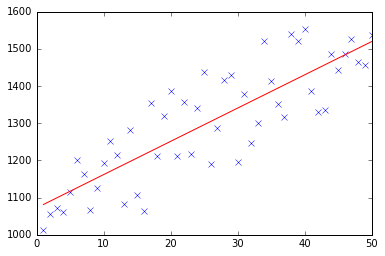

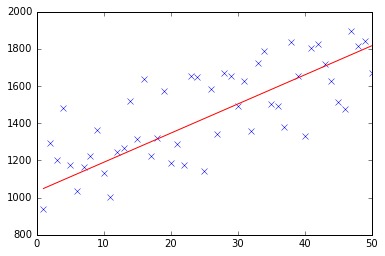

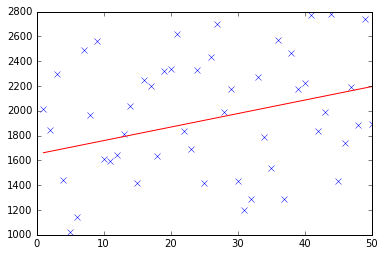

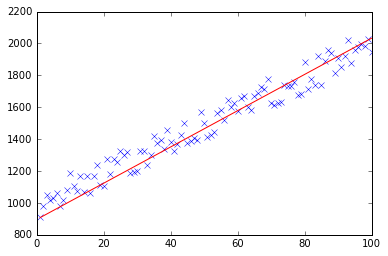

In [373]:
def case(N, variance, modelFunction):
    X, Y = generateSample(N, variance)
    X = np.hstack([np.matrix(np.ones(len(X))).T, X])
    w = modelFunction(X, Y)
    plotModel(X, Y, w)

case(50, 300, fitModel_equation)
case(50, 600, fitModel_gradient)
case(50, 1600, fitModel_gradient)
case(100, 200, fitModel_gradient)